In [1]:
import os
import numpy as np
import pandas as pd

In [3]:
# load data into pandas df
file_path = "D:/Scripts/bridges_project/climate_data.csv"

mylist = []

for chunk in pd.read_csv(file_path, chunksize=1000):
    mylist.append(chunk)

climate_df = pd.concat(mylist, axis= 0)
del mylist

In [ ]:
climate_df.head()

In [5]:
climate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 18 columns):
 #   Column                                        Non-Null Count    Dtype  
---  ------                                        --------------    -----  
 0   Year                                          1048575 non-null  int64  
 1   1 - State Code                                1048575 non-null  int64  
 2   1 - State Name                                1048575 non-null  object 
 3   8 - Structure Number                          1048575 non-null  object 
 4   2024 NBI Structure Number                     1048575 non-null  object 
 5   22 - Owner Agency                             1048575 non-null  object 
 6   Average Relative Humidity                     1031017 non-null  float64
 7   Average Temperature                           1031017 non-null  float64
 8   Maximum Temperature                           1031017 non-null  float64
 9   Mean Wind Speed                    

In [15]:
climate_df['8 - Structure Number'].value_counts()

8 - Structure Number
000000000007210    20
000000000007191    18
000000000006514    18
000000000007128    18
000000000007193    17
                   ..
874544              1
874542              1
874541              1
871075              1
36J17               1
Name: count, Length: 286813, dtype: int64

In [6]:
climate_df.isna().sum()

Year                                                0
1 - State Code                                      0
1 - State Name                                      0
8 - Structure Number                                0
2024 NBI Structure Number                           0
22 - Owner Agency                                   0
Average Relative Humidity                       17558
Average Temperature                             17558
Maximum Temperature                             17558
Mean Wind Speed                                 17558
Minimum Temperature                             17558
Number of Freeze-Thaw Cycles                     1819
Number of Snowfall Days                          1819
Number of Days with Measurable Precipitation    17558
Number of Days with Temperature Below 0?C       17558
Prevailing Wind Direction                       17558
Time of Wetness                                 17558
Total Precipitation                             17558
dtype: int64

In [16]:
# drop unneed cols
climate_df = climate_df.drop(columns= ['1 - State Name', '2024 NBI Structure Number', '22 - Owner Agency'])

In [17]:
# drop rows with all nulls
climate_df = climate_df.dropna(axis= 0, thresh= 12)

In [18]:
climate_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1031017 entries, 0 to 1048574
Data columns (total 15 columns):
 #   Column                                        Non-Null Count    Dtype  
---  ------                                        --------------    -----  
 0   Year                                          1031017 non-null  int64  
 1   1 - State Code                                1031017 non-null  int64  
 2   8 - Structure Number                          1031017 non-null  object 
 3   Average Relative Humidity                     1031017 non-null  float64
 4   Average Temperature                           1031017 non-null  float64
 5   Maximum Temperature                           1031017 non-null  float64
 6   Mean Wind Speed                               1031017 non-null  float64
 7   Minimum Temperature                           1031017 non-null  float64
 8   Number of Freeze-Thaw Cycles                  1031017 non-null  float64
 9   Number of Snowfall Days                 

In [19]:
climate_df.isna().sum()

Year                                            0
1 - State Code                                  0
8 - Structure Number                            0
Average Relative Humidity                       0
Average Temperature                             0
Maximum Temperature                             0
Mean Wind Speed                                 0
Minimum Temperature                             0
Number of Freeze-Thaw Cycles                    0
Number of Snowfall Days                         0
Number of Days with Measurable Precipitation    0
Number of Days with Temperature Below 0?C       0
Prevailing Wind Direction                       0
Time of Wetness                                 0
Total Precipitation                             0
dtype: int64

In [21]:
#save new df as csv, just in case
save_dir = "D:/Scripts/bridges_project/data"
save_name = "climate_clean.csv"
save_path = os.path.join(save_dir, save_name)
climate_df.to_csv(save_path, index= False)

In [22]:
# load bridges data into pandas df
file_path = "D:/Scripts/bridges_project/data/masterBridgesFinal.csv"

mylist = []

for chunk in pd.read_csv(file_path, chunksize=1000):
    mylist.append(chunk)

big_data = pd.concat(mylist, axis= 0)
del mylist

In [29]:
bridges_climate = pd.merge(
    left= climate_df,
    right= big_data,
    how= 'left',
    left_on= ['8 - Structure Number', 'Year'],
    right_on= ['STRUCTURE_NUMBER_008', 'YEAR'],
)

In [ ]:
big_data.info()    # 10208408 entries

In [30]:
bridges_climate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1053752 entries, 0 to 1053751
Data columns (total 63 columns):
 #   Column                                        Non-Null Count    Dtype  
---  ------                                        --------------    -----  
 0   Year                                          1053752 non-null  int64  
 1   1 - State Code                                1053752 non-null  int64  
 2   8 - Structure Number                          1053752 non-null  object 
 3   Average Relative Humidity                     1053752 non-null  float64
 4   Average Temperature                           1053752 non-null  float64
 5   Maximum Temperature                           1053752 non-null  float64
 6   Mean Wind Speed                               1053752 non-null  float64
 7   Minimum Temperature                           1053752 non-null  float64
 8   Number of Freeze-Thaw Cycles                  1053752 non-null  float64
 9   Number of Snowfall Days            

In [31]:
bridges_climate.isna().sum()

Year                              0
1 - State Code                    0
8 - Structure Number              0
Average Relative Humidity         0
Average Temperature               0
                              ...  
UNDWATER_FLAG_092BF          875030
SPEC_FLAG_092AF              875030
INSPECT_FLAG_090F            875030
REL_BRIDGE_AGE               875030
STRUCTURE_NUMBER_008_ID      875030
Length: 63, dtype: int64

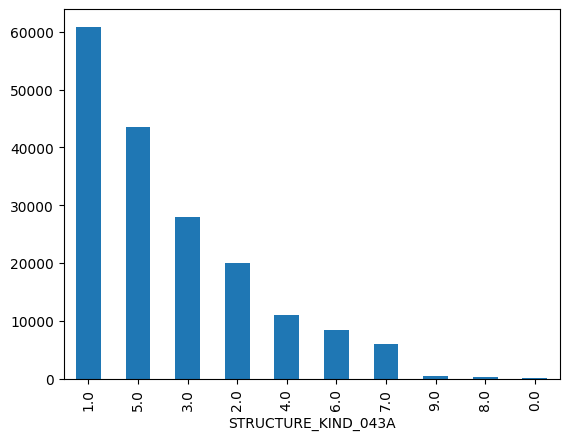

In [40]:
bridges_climate.STRUCTURE_KIND_043A.value_counts().plot(kind= 'bar');

In [34]:
climateBridges_df = bridges_climate.dropna(axis= 0, how= 'any')

In [35]:
climateBridges_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 178722 entries, 9 to 456433
Data columns (total 63 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   Year                                          178722 non-null  int64  
 1   1 - State Code                                178722 non-null  int64  
 2   8 - Structure Number                          178722 non-null  object 
 3   Average Relative Humidity                     178722 non-null  float64
 4   Average Temperature                           178722 non-null  float64
 5   Maximum Temperature                           178722 non-null  float64
 6   Mean Wind Speed                               178722 non-null  float64
 7   Minimum Temperature                           178722 non-null  float64
 8   Number of Freeze-Thaw Cycles                  178722 non-null  float64
 9   Number of Snowfall Days                       178722 

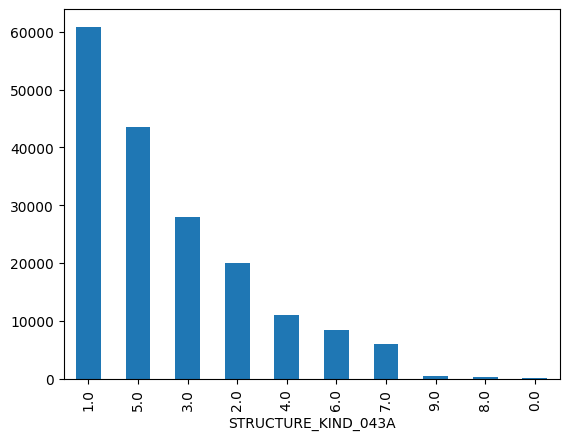

In [41]:
climateBridges_df.STRUCTURE_KIND_043A.value_counts().plot(kind= 'bar');

In [42]:
climateBridges_df.STRUCTURE_KIND_043A.value_counts()

STRUCTURE_KIND_043A
1.0    60855
5.0    43436
3.0    27971
2.0    20075
4.0    11084
6.0     8461
7.0     6078
9.0      414
8.0      283
0.0       65
Name: count, dtype: int64

In [44]:
climateBridges_df.head()

,Year,1 - State Code,8 - Structure Number,Average Relative Humidity,Average Temperature,Maximum Temperature,Mean Wind Speed,Minimum Temperature,Number of Freeze-Thaw Cycles,Number of Snowfall Days,...,PERCENT_ADT_TRUCK_109,SCOUR_CRITICAL_113,SUFFICIENCY_RATING,YEAR,FRACTURE_FLAG_092AF,UNDWATER_FLAG_092BF,SPEC_FLAG_092AF,INSPECT_FLAG_090F,REL_BRIDGE_AGE,STRUCTURE_NUMBER_008_ID
9,2017,1,019547,76.0,17.1,38.2,0.0,-11.7,43.0,5.0,...,13.0,8.0,82.3,2017.0,0.0,0.0,0.0,1.0,5.0,749331.0
18,2017,1,000273,77.0,17.8,39.5,0.0,-8.6,40.0,4.0,...,12.0,8.0,77.3,2017.0,0.0,0.0,0.0,1.0,35.0,435671.0
33,2017,1,019668,76.0,19.0,36.8,0.0,-9.3,23.0,3.0,...,32.0,8.0,87.7,2017.0,0.0,0.0,0.0,1.0,6.0,691820.0
34,2017,1,019669,76.0,19.0,36.8,0.0,-9.3,23.0,3.0,...,32.0,8.0,87.7,2017.0,0.0,0.0,0.0,1.0,7.0,691821.0
40,2017,1,000341,77.0,17.8,39.5,0.0,-8.6,40.0,4.0,...,12.0,8.0,76.2,2017.0,0.0,0.0,0.0,1.0,91.0,435694.0


In [45]:
climateBridges_df.columns.tolist()

['Year',
 '1 - State Code',
 '8 - Structure Number',
 'Average Relative Humidity',
 'Average Temperature',
 'Maximum Temperature',
 'Mean Wind Speed',
 'Minimum Temperature',
 'Number of Freeze-Thaw Cycles',
 'Number of Snowfall Days',
 'Number of Days with Measurable Precipitation',
 'Number of Days with Temperature Below 0?C',
 'Prevailing Wind Direction',
 'Time of Wetness',
 'Total Precipitation',
 'STATE_CODE_001',
 'STRUCTURE_NUMBER_008',
 'SERVICE_LEVEL_005C',
 'DIRECTION_005E',
 'FUNCTIONAL_CLASS_026',
 'YEAR_BUILT_027',
 'TRAFFIC_LANES_ON_028A',
 'TRAFFIC_LANES_UND_028B',
 'ADT_029',
 'MEDIAN_CODE_033',
 'DEGREES_SKEW_034',
 'STRUCTURE_FLARED_035',
 'OPEN_CLOSED_POSTED_041',
 'SERVICE_ON_042A',
 'SERVICE_UND_042B',
 'STRUCTURE_KIND_043A',
 'STRUCTURE_TYPE_043B',
 'APPR_KIND_044A',
 'APPR_TYPE_044B',
 'MAIN_UNIT_SPANS_045',
 'APPR_SPANS_046',
 'MAX_SPAN_LEN_MT_048',
 'STRUCTURE_LEN_MT_049',
 'DECK_COND_058',
 'SUPERSTRUCTURE_COND_059',
 'SUBSTRUCTURE_COND_060',
 'CHANNEL_COND_0

In [47]:
climateBridges_df = climateBridges_df.drop(columns= ['STATE_CODE_001', 'STRUCTURE_NUMBER_008'])

In [48]:
climateBridges_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 178722 entries, 9 to 456433
Data columns (total 61 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   Year                                          178722 non-null  int64  
 1   1 - State Code                                178722 non-null  int64  
 2   8 - Structure Number                          178722 non-null  object 
 3   Average Relative Humidity                     178722 non-null  float64
 4   Average Temperature                           178722 non-null  float64
 5   Maximum Temperature                           178722 non-null  float64
 6   Mean Wind Speed                               178722 non-null  float64
 7   Minimum Temperature                           178722 non-null  float64
 8   Number of Freeze-Thaw Cycles                  178722 non-null  float64
 9   Number of Snowfall Days                       178722 

In [50]:
#save new df as csv
save_dir = "D:/Scripts/bridges_project/data"
save_name = "climate_bridges.csv"
save_path = os.path.join(save_dir, save_name)
climateBridges_df.to_csv(save_path, index= False)